#Foundations for DL


##  **1-Implement the perceptron algorithme (slide 20)**
ps : L is the number of iterations


In [1]:

import numpy as np


def perceptron (l, xi, yi, learning_rate):
    # xi, yi array
    weights = np.zeros(xi.shape[1]) 
    b = 0.5
    for j in range(l):
        for i in range(xi.shape[0]):
            activation = np.dot(weights, xi[i]) + b
            if activation >= 0:
                prediction = 1
            else:
                prediction = 0
            error = yi[i] - prediction
            weights += learning_rate * error * xi[i]
            b +=  learning_rate * error
    return weights , b

##  **2-Train the perceptron on the folowing dataset, composed of 3 samples, 3 features and one label.**
[[3,2, 1,0], [1,1,1,1], [1, 2, 3,1]]

Initialize weights to zero, the bias to 0.5 and the learning rate to 0.5.

##  **3-Print the final values of weights and bias after one iteration.**

In [2]:
learning_rate = 0.1

X_train = np.array([[3, 2 , 1], [1, 1, 1], [1, 2, 3]])
y_train = np.array([0, 1, 1])

updated_weights = perceptron(1,X_train, y_train, learning_rate)
print(updated_weights)

(array([-0.2, -0.1,  0. ]), 0.5)


## **4-Generate a randon dataset (non linearly separable) with 2 features and one label.**
## **5-Train the perceptron on this dataset.**
## **6-Plot the datapoints in the dataset and the generated model.**
## **7-Print the confusion matrix and the different evaluation metrics of the generated model on the training dataset.**


#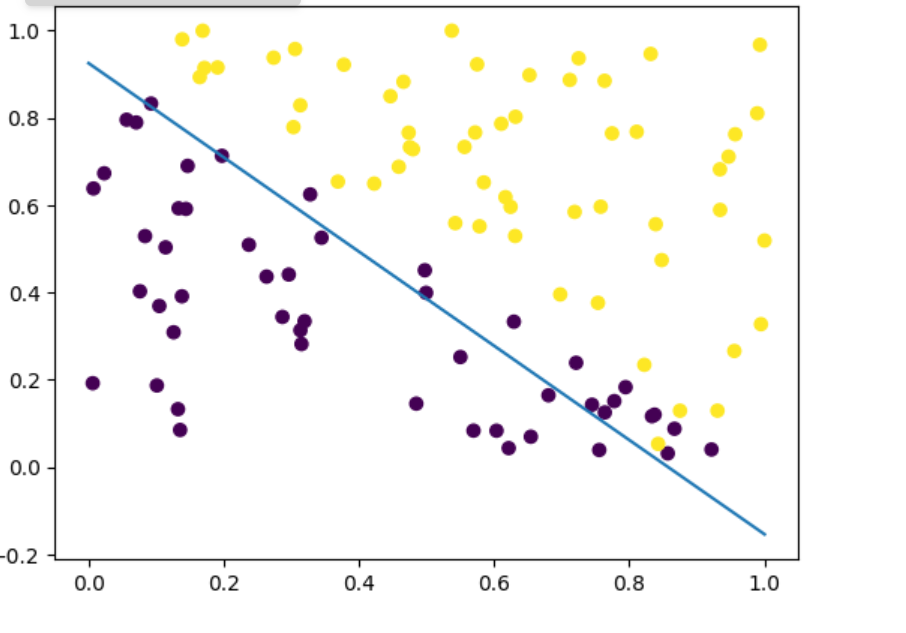

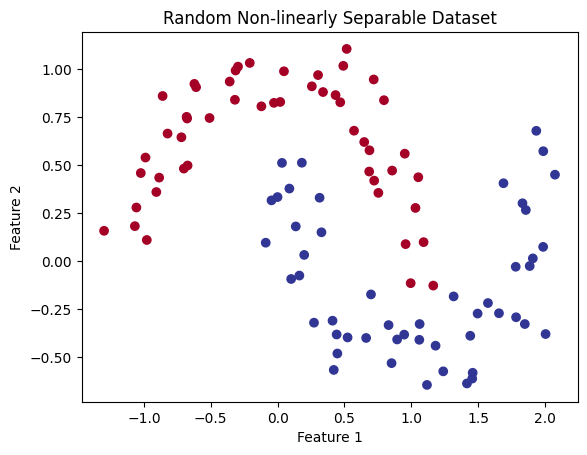

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate a random non-linearly separable dataset
X, y = make_moons(n_samples=100, noise=0.15)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Random Non-linearly Separable Dataset')
plt.show()

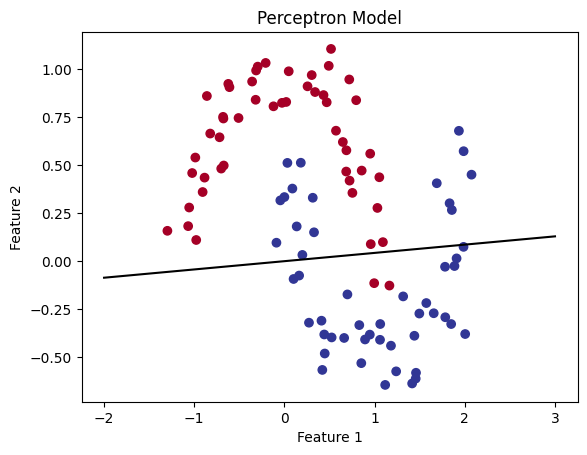

In [31]:
epochs = 100
weights, bias = perceptron(epochs, X, y, learning_rate)

# Plot the datapoints and the generated model
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

x_vals = np.linspace(-2, 3, 100)
y_vals = -(weights[0] * x_vals + bias) / weights[1]

plt.plot(x_vals, y_vals, color='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Model')
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

predictions = []
for i in range(X.shape[0]):
    activation = np.dot(weights, X[i]) + bias
    if activation >= 0:
        predictions.append(1)
    else:
        predictions.append(0)

confusion_mat = confusion_matrix(y, predictions)
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)

# Print evaluation metrics and confusion matrix
print('Confusion Matrix:')
print(confusion_mat)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Confusion Matrix:
[[48  2]
 [16 34]]
Accuracy: 0.82
Precision: 0.9444444444444444
Recall: 0.68
F1 Score: 0.7906976744186047


## **8-Implement the adaline algorithm**
## **9-Train it on the previously generated dataset**
## **10-Plot the datapoints in the dataset and the generated model.**
## **11-Print the confusion matrix and the different evaluation metrics of the generated model on the training dataset.**
## **12- witch model is more efficient : Perceptron or Adaline? explain why**


In [9]:
def adaline(l, xi, yi, learning_rate):
    w = np.zeros(xi.shape[1])
    b = 0.5
    for epoch in range(l):
        for j in range(len(xi)):
            f = np.dot(w,xi[j])+b #linear activation fct
            w -= learning_rate * (f-yi[j]) * xi[j]
            b -= learning_rate * (f-yi[j])
    return w,b 



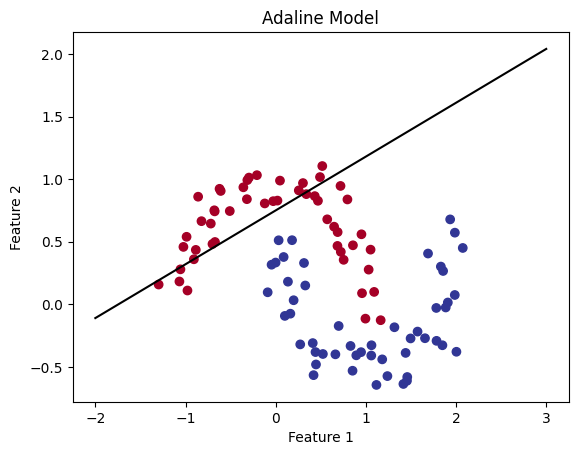

In [39]:
epochs = 150
weights_ad, bias_ad = adaline(epochs, X, y, learning_rate=0.65)

#Plot the datapoints and the generated model
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

x_vals = np.linspace(-2, 3, 100)
y_vals = -(weights_ad[0] * x_vals + bias_ad) / weights[1]

plt.plot(x_vals, y_vals, color='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Adaline Model')
plt.show()

In [36]:
y_pred_adaline = np.where(np.dot(X, weights_ad) + bias_ad >= 0, 1, 0)
y_pred_adaline

# Evaluation Metrics
accuracy = accuracy_score(y, y_pred_adaline)
precision = precision_score(y, y_pred_adaline)
recall = recall_score(y, y_pred_adaline)
f1 = f1_score(y, y_pred_adaline)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y, y_pred_adaline)
print("Confusion Matrix:")
print(conf_matrix)


Evaluation Metrics:
Accuracy: 0.82
Precision: 0.7424242424242424
Recall: 0.98
F1 Score: 0.8448275862068965
Confusion Matrix:
[[33 17]
 [ 1 49]]


Based on the provided metrics, the Adaline model is more efficient in terms of capturing positive instances (higher recall) while sacrificing some precision. Adaline achieves a recall of 0.98, which means it correctly identifies a higher proportion of positive instances compared to the Perceptron's recall of 0.68. Adaline's precision is slightly lower at 0.742 compared to the Perceptron's precision of 0.944, indicating that Adaline produces more false positives.